<a href="https://colab.research.google.com/github/aryadeo/NEURAL_NETWORK_BASICS/blob/master/MP_NEURON/MP_NEURON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MP Neuron

![sample_model](https://drive.google.com/uc?id=1WyG5pTQGYftDWCkbmdb_3kk_V84lin2v)

Objective: looking for a tissue in the dataset of breast cancer for whether that is malignant or belign.

---



In [0]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd

##Loading the data and data wrangling

In [0]:
breast_cancer=sklearn.datasets.load_breast_cancer()

In [0]:
X=breast_cancer.data
Y=breast_cancer.target

In [4]:
print(X.shape,Y.shape)

(569, 30) (569,)


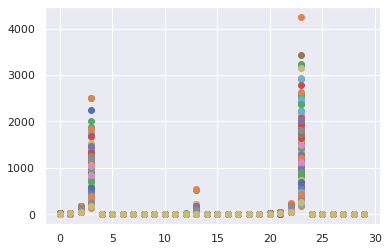

In [5]:
plt.plot(X.T,'o')
plt.show()

Converting the data loded into a dataframe

In [0]:
data=pd.DataFrame(X,columns=breast_cancer.feature_names)

Looking at the dataframe

In [7]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Inserting another column named as class at the end of the dataframe

In [0]:
data['class']=breast_cancer.target

In [9]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


Now we will see for each class how many rows are there.

In [11]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


Here we can see that the number of ones are more than number of zeros. We can have a view of this in an alternate manner.

In [12]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Here you can see that the mean of number of ones is greater than the mean of number of zeros.

if we need to check waht are the target names ...

In [13]:
print(breast_cancer.target_names)
#1 for malignant and 0 for benign.

['malignant' 'benign']


Grouping of the data through clasess

In [0]:
g=data.groupby(['class'])

In [15]:
for key,data_key in (g):
  print(key)
  print(data_key)

0
     mean radius  mean texture  ...  worst fractal dimension  class
0          17.99         10.38  ...                  0.11890      0
1          20.57         17.77  ...                  0.08902      0
2          19.69         21.25  ...                  0.08758      0
3          11.42         20.38  ...                  0.17300      0
4          20.29         14.34  ...                  0.07678      0
..           ...           ...  ...                      ...    ...
563        20.92         25.09  ...                  0.09873      0
564        21.56         22.39  ...                  0.07115      0
565        20.13         28.25  ...                  0.06637      0
566        16.60         28.08  ...                  0.07820      0
567        20.60         29.33  ...                  0.12400      0

[212 rows x 31 columns]
1
     mean radius  mean texture  ...  worst fractal dimension  class
19        13.540         14.36  ...                  0.07259      1
20        13.080   

Getting the sense of the grouped data

In [16]:
g.mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


here we are getting the mean of every feature in group manner

##Splitting of the data in train set ad test set

In [0]:
from sklearn.model_selection import train_test_split

In [18]:
type(X),type(Y)
#the X and Y are in the form of numpy array now. we nee to make it into dataframe first for further processing.

(numpy.ndarray, numpy.ndarray)

In [19]:
print(data.head())

   mean radius  mean texture  ...  worst fractal dimension  class
0        17.99         10.38  ...                  0.11890      0
1        20.57         17.77  ...                  0.08902      0
2        19.69         21.25  ...                  0.08758      0
3        11.42         20.38  ...                  0.17300      0
4        20.29         14.34  ...                  0.07678      0

[5 rows x 31 columns]


We will set the class column of the dataframe as target 'y' and remaning data as X i.e. the input vector.

In [0]:
Y=data['class']
del data['class']
X=data

In [21]:
print(type(X),X,X.shape,type(Y),Y,Y.shape)

<class 'pandas.core.frame.DataFrame'>      mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns] (569, 30) <cl

Now let's split the dataset

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [23]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(426, 30) (143, 30) (426,) (143,)


Here we can see that the percentage of data splititing  is about 33%. We can actually control this ampount of data splitting

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)#10% of data for testing purpose
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(512, 30) (57, 30) (512,) (57,)


Now lets check the number of 1's in each of the splitted dataset

In [25]:
print(Y_train.mean(),Y_test.mean(),Y.mean())

0.630859375 0.5964912280701754 0.6274165202108963


It can be observed that the mean of #1's are not same in each of the splitted dataset. To make it a uniform splitting, we need to stratify the splitting proces.

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y)#10% of data for testing purpose
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
print(Y_train.mean(),Y_test.mean(),Y.mean())

(512, 30) (57, 30) (512,) (57,)
0.626953125 0.631578947368421 0.6274165202108963


The the ratio of #1's are maintained.

Let's do the same for X data. 

In [27]:
print(X_train.mean(),X_test.mean(),X.mean())

mean radius                 14.128963
mean texture                19.315742
mean perimeter              91.957793
mean area                  655.583984
mean smoothness              0.096306
mean compactness             0.103860
mean concavity               0.088667
mean concave points          0.048952
mean symmetry                0.180872
mean fractal dimension       0.062770
radius error                 0.407076
texture error                1.227269
perimeter error              2.868984
area error                  40.683939
smoothness error             0.007064
compactness error            0.025342
concavity error              0.031919
concave points error         0.011758
symmetry error               0.020445
fractal dimension error      0.003806
worst radius                16.280658
worst texture               25.723574
worst perimeter            107.243125
worst area                 882.959961
worst smoothness             0.132437
worst compactness            0.252343
worst concav

Lets resplit the data and check for the mean values of splitted dataset once again.

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y)
print(X_train.mean(),X_test.mean(),X.mean())

mean radius                 14.160422
mean texture                19.295254
mean perimeter              92.199785
mean area                  657.744336
mean smoothness              0.096512
mean compactness             0.104786
mean concavity               0.089119
mean concave points          0.049270
mean symmetry                0.181278
mean fractal dimension       0.062785
radius error                 0.404749
texture error                1.220332
perimeter error              2.859289
area error                  40.516463
smoothness error             0.006975
compactness error            0.025320
concavity error              0.031703
concave points error         0.011747
symmetry error               0.020409
fractal dimension error      0.003794
worst radius                16.312070
worst texture               25.684590
worst perimeter            107.536250
worst area                 885.852148
worst smoothness             0.132363
worst compactness            0.254778
worst concav

Here we can observe that for every splitting the average value of train and test dataset are varying. i.e. the reproducability property is not there. so to make it happen, we need to make the follwing chage in the splitting.

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)
print(X_train.mean(),X_test.mean(),X.mean())

mean radius                 14.058656
mean texture                19.309668
mean perimeter              91.530488
mean area                  648.097266
mean smoothness              0.096568
mean compactness             0.105144
mean concavity               0.089342
mean concave points          0.048892
mean symmetry                0.181961
mean fractal dimension       0.062979
radius error                 0.403659
texture error                1.206856
perimeter error              2.861173
area error                  39.935506
smoothness error             0.007067
compactness error            0.025681
concavity error              0.032328
concave points error         0.011963
symmetry error               0.020584
fractal dimension error      0.003815
worst radius                16.194275
worst texture               25.644902
worst perimeter            106.757715
worst area                 871.647852
worst smoothness             0.132592
worst compactness            0.257415
worst concav

Now rerun the code and check whether or not the reproducability is there or not

After checkig the reproducability we are moving towards next section.

##Binarization of data

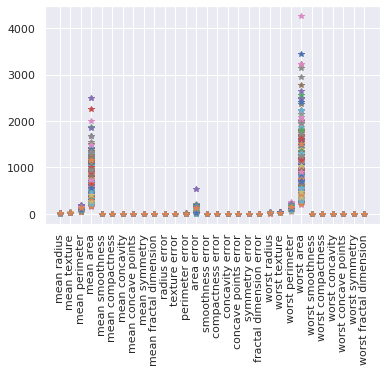

In [30]:
plt.plot(X_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

Let's consider the 4th feature, i.e. mean area. Its values varies upto nearly 2800. We can binarize it by aapplying a lamda function. 

In [0]:
X_train_binarized_3=X_train['mean area'].map(lambda x: 1 if x>1000 else 0)


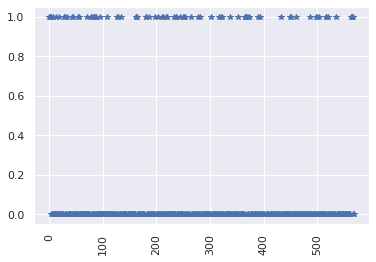

In [32]:
plt.plot(X_train_binarized_3.T,'*')
plt.xticks(rotation='vertical')
plt.show()

To apply the dataset in MP neuron model we have to do the same for all the columns. Which is not preferable. So we apply pd.cut() function on the entire dataset.

In [0]:
X_train_binarized=X_train.apply(pd.cut,bins=2,labels=[0,1])


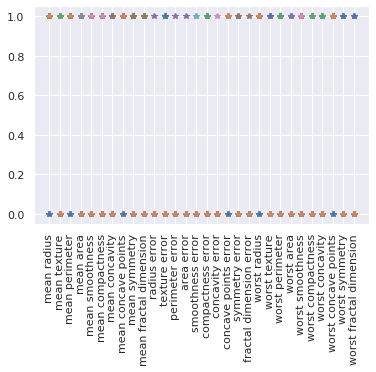

In [34]:
plt.plot(X_train_binarized.T,'*')
plt.xticks(rotation='vertical')
plt.show()

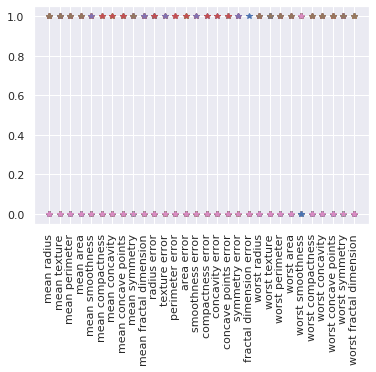

In [35]:
X_test_binarized=X_test.apply(pd.cut,bins=2,labels=[0,1])
plt.plot(X_test_binarized.T,'*')
plt.xticks(rotation='vertical')
plt.show()